## Importing Libraries

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier

## Importing Data

In [3]:
data = pd.read_csv('cancer_data')
data.head(1)

,ID,Gene,Variation,TEXT,Class
0,0,FAM58A,Truncating_Mutations,cyclin dependent kinases cdks regulate variety...,1


In [4]:
y = data['Class'].values

In [5]:
data.drop(['Class','ID'], axis=1, inplace=True)

In [6]:
data.head(5)

,Gene,Variation,TEXT
0,FAM58A,Truncating_Mutations,cyclin dependent kinases cdks regulate variety...
1,CBL,W802*,abstract background non small cell lung cancer...
2,CBL,Q249E,abstract background non small cell lung cancer...
3,CBL,N454D,recent evidence demonstrated acquired uniparen...
4,CBL,L399V,oncogenic mutations monomeric casitas b lineag...


In [6]:
print(y.shape)
print(data.shape)

(3321,)
(3321, 3)


## Splitting Data

In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(2124, 3) (2124,)
(532, 3) (532,)
(665, 3) (665,)


## Vectorizing Data

## TFIDF Vectorization of TEXT

In [8]:
vec_essay = TfidfVectorizer(min_df=3,ngram_range=(2,4), max_features=3000)
vec_essay.fit(X_train['TEXT'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vec_essay.transform(X_train['TEXT'].values)
X_cv_essay_tfidf = vec_essay.transform(X_cv['TEXT'].values)
X_test_essay_tfidf = vec_essay.transform(X_test['TEXT'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)


After vectorizations
(2124, 3000) (2124,)
(532, 3000) (532,)
(665, 3000) (665,)


## one hot encoding the catogorical features: Gene

In [9]:
vec_gene = TfidfVectorizer()
vec_gene.fit(X_train['Gene'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_gene = vec_gene.transform(X_train['Gene'].values)
X_cv_gene = vec_gene.transform(X_cv['Gene'].values)
X_test_gene = vec_gene.transform(X_test['Gene'].values)

print("After vectorizations")
print(X_train_gene.shape, y_train.shape)
print(X_cv_gene.shape, y_cv.shape)
print(X_test_gene.shape, y_test.shape)
print("="*100)

After vectorizations
(2124, 225) (2124,)
(532, 225) (532,)
(665, 225) (665,)


## one hot encoding the catogorical features: Variation

In [10]:
vec_var = TfidfVectorizer()
vec_var.fit(X_train['Variation'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Variation = vec_var.transform(X_train['Variation'].values)
X_cv_Variation = vec_var.transform(X_cv['Variation'].values)
X_test_Variation = vec_var.transform(X_test['Variation'].values)

print("After vectorizations")
print(X_train_Variation.shape, y_train.shape)
print(X_cv_Variation.shape, y_cv.shape)
print(X_test_Variation.shape, y_test.shape)
print("="*100)

After vectorizations
(2124, 1956) (2124,)
(532, 1956) (532,)
(665, 1956) (665,)


In [11]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [12]:

# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
     
    vec_text = TfidfVectorizer(max_features=3000)
    vec_text.fit(X_train['TEXT'].values) 
    fea1_len = 225
    fea2_len = 1956
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = vec_gene.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = vec_var.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = vec_text.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

## Concatenation of vectorized data

In [14]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr = hstack((X_train_gene,X_train_Variation,X_train_essay_tfidf)).tocsr()
X_cr = hstack((X_cv_gene,X_cv_Variation,X_cv_essay_tfidf)).tocsr()
X_te = hstack((X_test_gene,X_test_Variation,X_test_essay_tfidf)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(2124, 5181) (2124,)
(532, 5181) (532,)
(665, 5181) (665,)


## Applying Naive Bayes

In [15]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

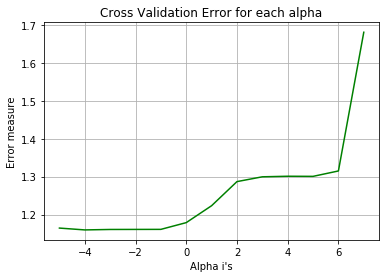

1e-05   1.1644773702207867
0.0001   1.1596374985253286
0.001   1.1608266439303048
0.1   1.1610890627801411
1   1.1788452139131909
10   1.2234175928835063
100   1.2869224184971098
1000   1.2995705740982777
10000   1.3010444693088477
100000   1.3007429687415502
1000000   1.3149684489466371
10000000   1.6804663803607676


In [52]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000,10000,100000,1000000,10000000 ]
cv_log_error_array = []
for i in alpha:
    
    clf = MultinomialNB(alpha=i,class_prior=[1,1,1,1,1,1,1,1,1], fit_prior=True)
    clf.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_tr, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cr)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
#for i, txt in enumerate(np.round(cv_log_error_array,3)):
    #ax.annotate((np.log10(alpha[i]),np.round(txt,3)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
#plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

for i in range(len(alpha)):
    print(alpha[i]," ",cv_log_error_array[i])



In [87]:
best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha],class_prior=[1,1,1,1,1,1,1,1,1], fit_prior=True)
clf.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr, y_train)


predict_y = sig_clf.predict_proba(X_tr)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cr)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_te)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(X_cr)- y_cv))/y_cv.shape[0])

For values of best alpha =  0.0001 The train log loss is: 0.6284856711140588
For values of best alpha =  0.0001 The cross validation log loss is: 1.1596374985253286
For values of best alpha =  0.0001 The test log loss is: 1.194991842452836
Number of missclassified point : 0.35150375939849626


In [163]:
test_point_index = 6
no_feature = 100
predicted_cls = sig_clf.predict(X_tr[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(X_tr[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['TEXT'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1183 0.0722 0.0247 0.3216 0.063  0.0651 0.192  0.1103 0.0329]]
Actual Class : 4
--------------------------------------------------
0 Text feature [via] present in test data point [True]
3 Text feature [curve] present in test data point [True]
5 Text feature [total] present in test data point [True]
6 Text feature [32] present in test data point [True]
12 Text feature [yeast] present in test data point [True]
15 Text feature [fibroblasts] present in test data point [True]
18 Text feature [various] present in test data point [True]
20 Text feature [benefit] present in test data point [True]
24 Text feature [using] present in test data point [True]
25 Text feature [transcript] present in test data point [True]
29 Text feature [32p] present in test data point [True]
30 Text feature [293t] present in test data point [True]
32 Text feature [weight] present in test data point [True]
38 Text feature [would] present in test data point [True

-------------------- Confusion matrix --------------------


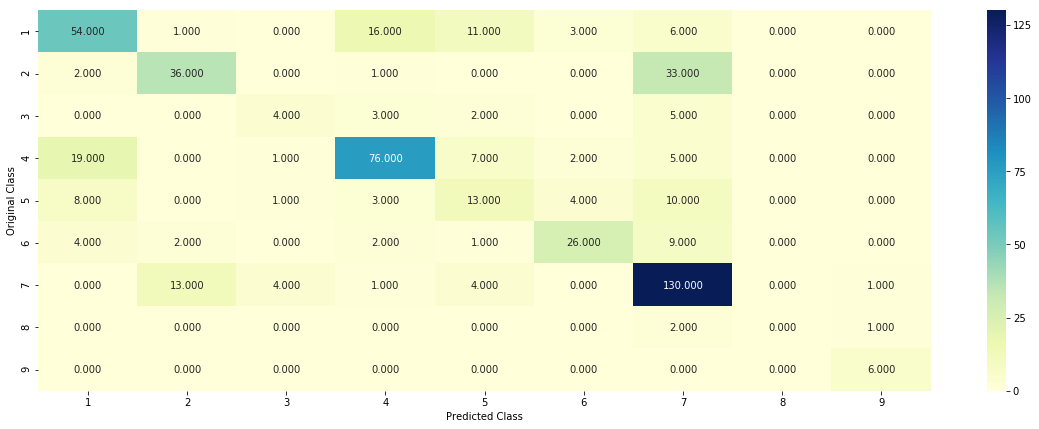

-------------------- Precision matrix (Columm Sum=1) --------------------


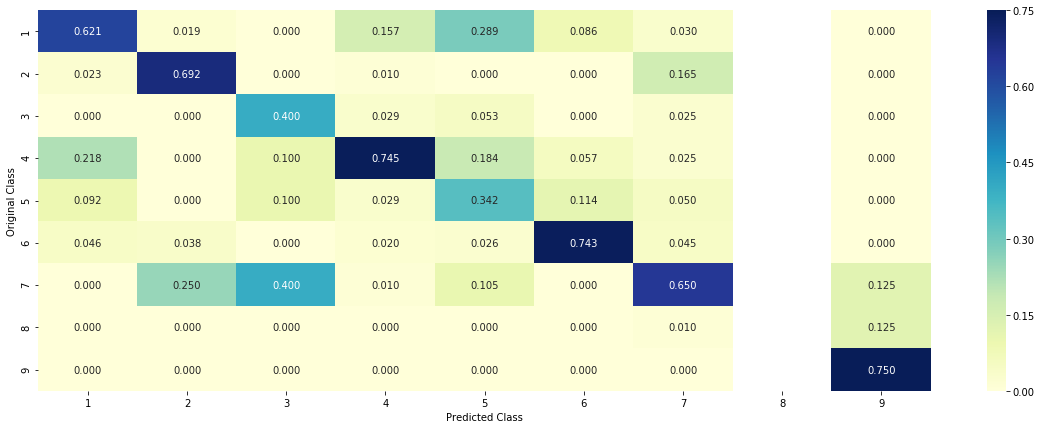

-------------------- Recall matrix (Row sum=1) --------------------


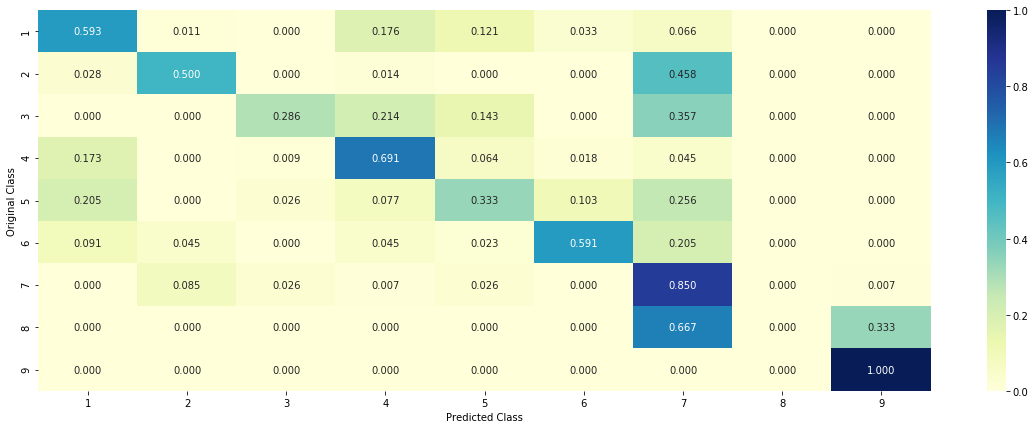

In [31]:
plot_confusion_matrix(y_cv, sig_clf.predict(X_cr.toarray()))

## Applying Logistice Regression

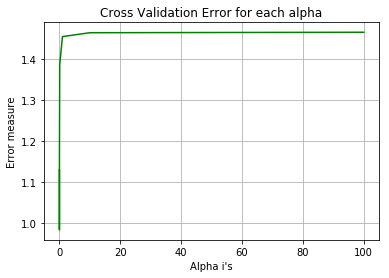

1e-06   1.1306461189603845
1e-05   1.0775412006368328
0.0001   0.9842804227515697
0.001   1.0254581224413821
0.01   1.1706120767059751
0.1   1.3861747448580524
1   1.4543745873245921
10   1.4637855276763687
100   1.4649500383569127


In [164]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=0)
    clf.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_tr, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cr)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
#for i, txt in enumerate(np.round(cv_log_error_array,3)):
    #ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
#plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

for i in range(len(alpha)):
    print(alpha[i]," ",cv_log_error_array[i])



In [165]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=0)
clf.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr, y_train)


predict_y = sig_clf.predict_proba(X_tr)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cr)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_te)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(X_cr)- y_cv))/y_cv.shape[0])

For values of best alpha =  0.0001 The train log loss is: 0.41806646389051993
For values of best alpha =  0.0001 The cross validation log loss is: 0.9842804227515697
For values of best alpha =  0.0001 The test log loss is: 0.9763560738813613
Number of missclassified point : 0.34210526315789475


-------------------- Confusion matrix --------------------


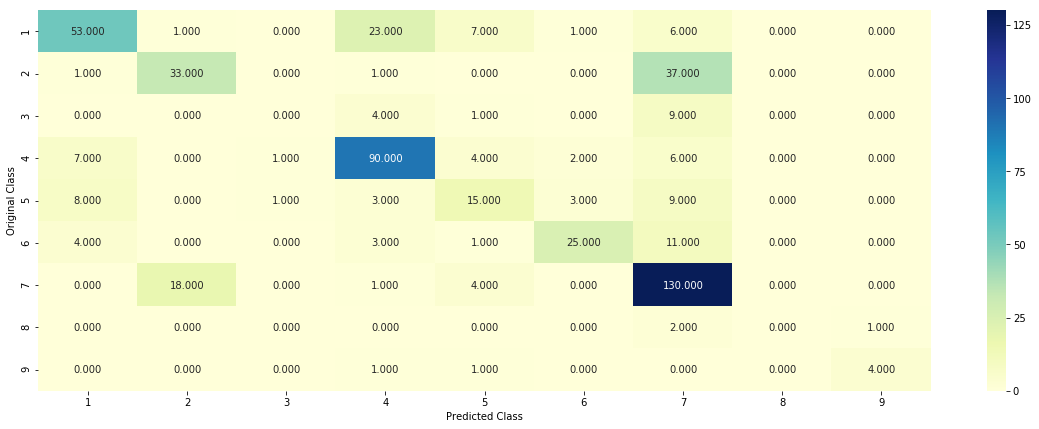

-------------------- Precision matrix (Columm Sum=1) --------------------


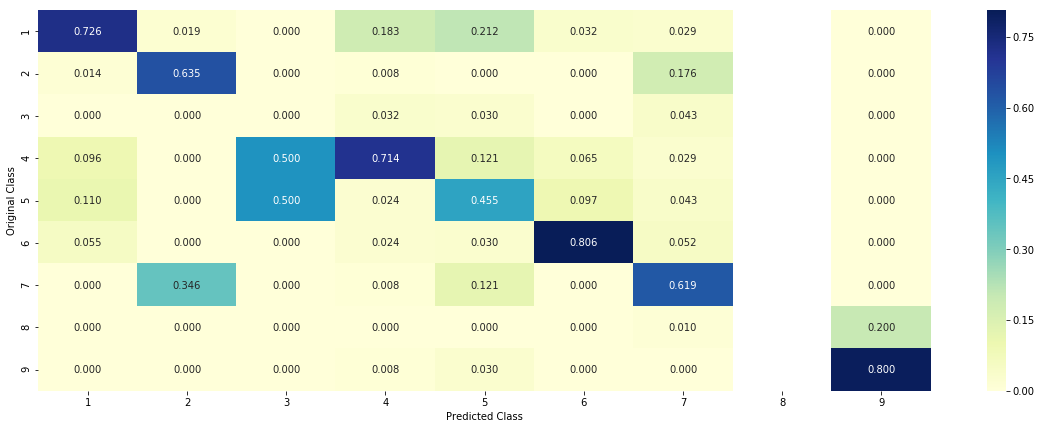

-------------------- Recall matrix (Row sum=1) --------------------


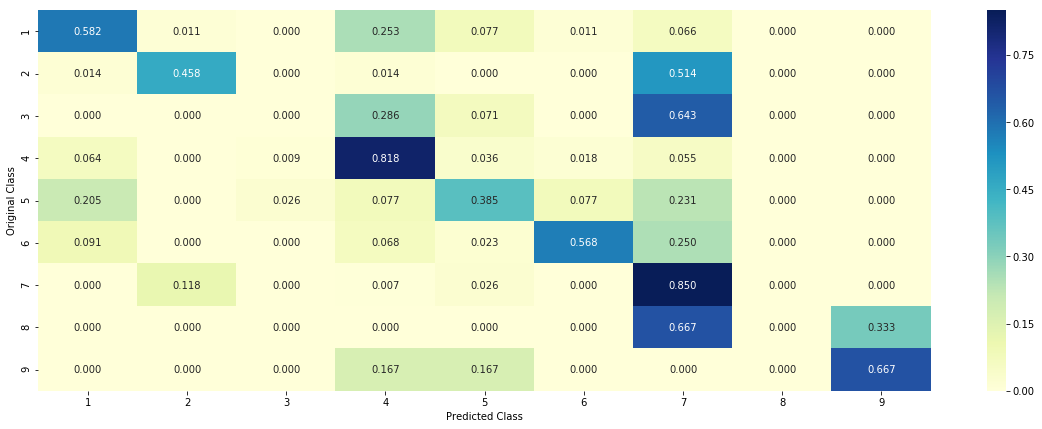

In [166]:
plot_confusion_matrix(y_cv, sig_clf.predict(X_cr.toarray()))

In [168]:
test_point_index = 6
no_feature = 100
predicted_cls = sig_clf.predict(X_tr[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(X_tr[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['TEXT'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0196 0.0805 0.0071 0.0141 0.0199 0.0171 0.8365 0.0025 0.0028]]
Actual Class : 4
--------------------------------------------------
6 Text feature [constructed] present in test data point [True]
13 Text feature [middle] present in test data point [True]
18 Text feature [bd] present in test data point [True]
27 Text feature [drug] present in test data point [True]
33 Text feature [repair] present in test data point [True]
38 Text feature [even] present in test data point [True]
58 Text feature [wt] present in test data point [True]
61 Text feature [crystal] present in test data point [True]
63 Text feature [genomic] present in test data point [True]
95 Text feature [stem] present in test data point [True]
Out of the top  100  features  10 are present in query point


## Applying K nearest neighbours

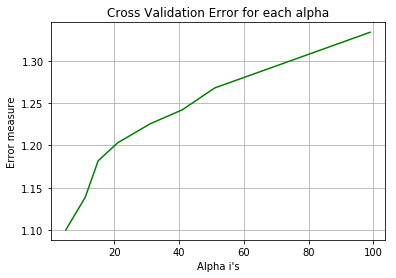

5   1.1002310134551063
11   1.1387067782228124
15   1.18186550677828
21   1.2029838343782149
31   1.2253974899989004
41   1.2420348417077207
51   1.267812771643906
99   1.3335559175511995


In [170]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_tr, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cr)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
#for i, txt in enumerate(np.round(cv_log_error_array,3)):
    #ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
#plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

for i in range(len(alpha)):
    print(alpha[i]," ",cv_log_error_array[i])



In [171]:
best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr, y_train)


predict_y = sig_clf.predict_proba(X_tr)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cr)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_te)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(X_cr)- y_cv))/y_cv.shape[0])

For values of best alpha =  5 The train log loss is: 0.8926680843199613
For values of best alpha =  5 The cross validation log loss is: 1.1002310134551063
For values of best alpha =  5 The test log loss is: 1.0777367908451703
Number of missclassified point : 0.37218045112781956


-------------------- Confusion matrix --------------------


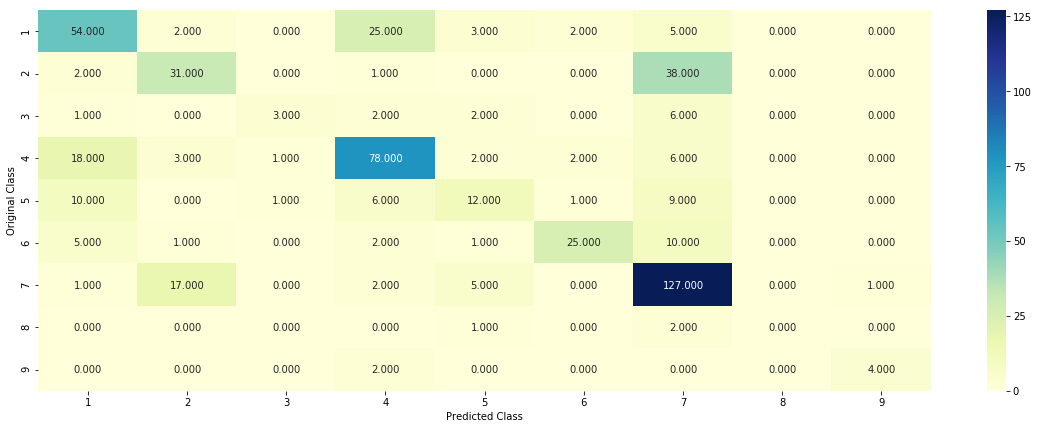

-------------------- Precision matrix (Columm Sum=1) --------------------


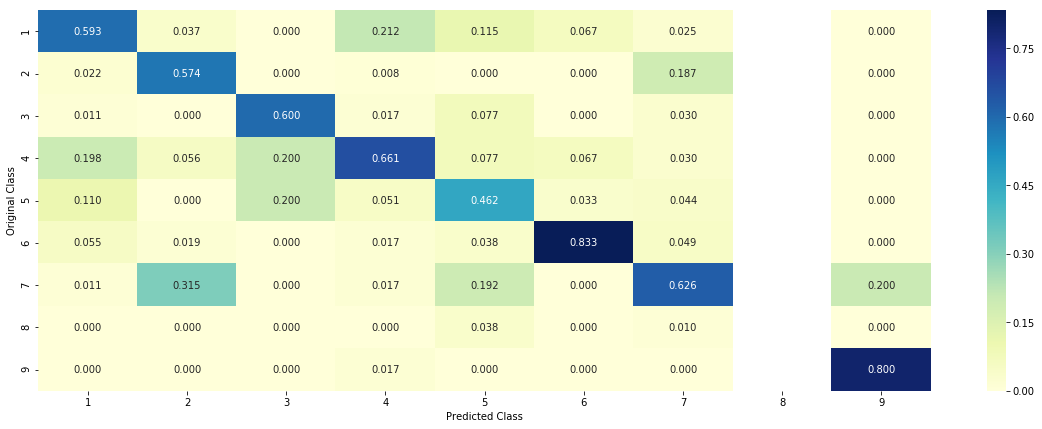

-------------------- Recall matrix (Row sum=1) --------------------


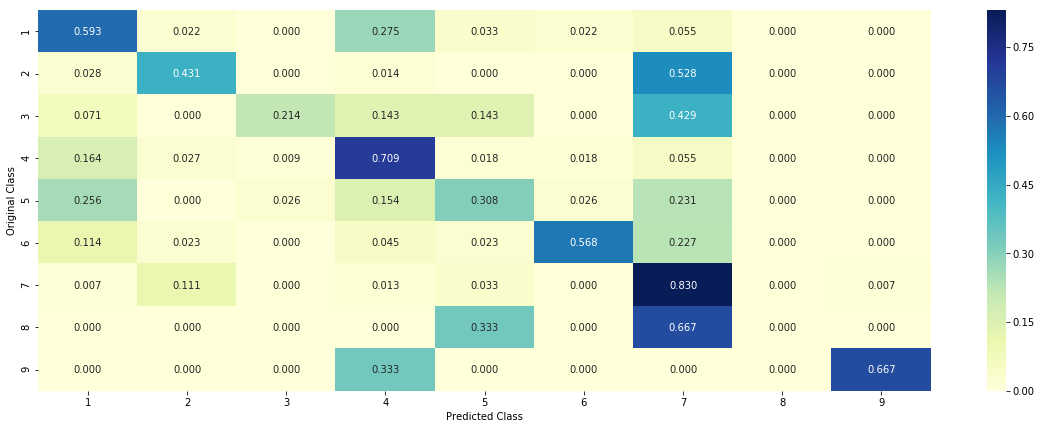

In [172]:
plot_confusion_matrix(y_cv, sig_clf.predict(X_cr.toarray()))

In [175]:
from collections import Counter
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr, y_train)

test_point_index = 1
predicted_cls = sig_clf.predict(X_te[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", y_test[test_point_index])
neighbors = clf.kneighbors(X_te[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",y_train[neighbors[1][0]])
print("Fequency of nearest points :",Counter(y_train[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 6
The  5  nearest neighbours of the test points belongs to classes [7 7 6 7 2]
Fequency of nearest points : Counter({7: 3, 6: 1, 2: 1})


## Applying linear support vector machines

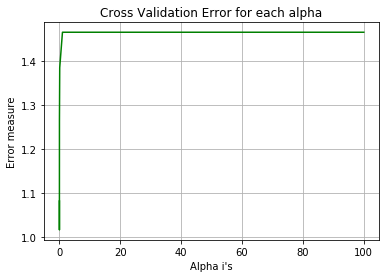

1e-05   1.0820882464712338
0.0001   1.0165029404836752
0.001   1.0812394954016527
0.01   1.2657500787820297
0.1   1.3848400843866704
1   1.465295974166659
10   1.4652959920310864
100   1.4652959969394483


In [17]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    
    clf = SGDClassifier(alpha=i, loss='hinge', random_state=0,learning_rate='optimal', class_weight='balanced',max_iter=2000, tol=1e-5)
    clf.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_tr, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cr)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
#for i, txt in enumerate(np.round(cv_log_error_array,3)):
    #ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
#plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

for i in range(len(alpha)):
    print(alpha[i]," ",cv_log_error_array[i])



In [18]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], loss='hinge', random_state=0,learning_rate='optimal', class_weight='balanced',max_iter=2000, tol=1e-5)
clf.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr, y_train)


predict_y = sig_clf.predict_proba(X_tr)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cr)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_te)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(X_cr)- y_cv))/y_cv.shape[0])

For values of best alpha =  0.0001 The train log loss is: 0.3886588790970561
For values of best alpha =  0.0001 The cross validation log loss is: 1.0165029404836752
For values of best alpha =  0.0001 The test log loss is: 1.0125190183529638
Number of missclassified point : 0.34398496240601506


-------------------- Confusion matrix --------------------


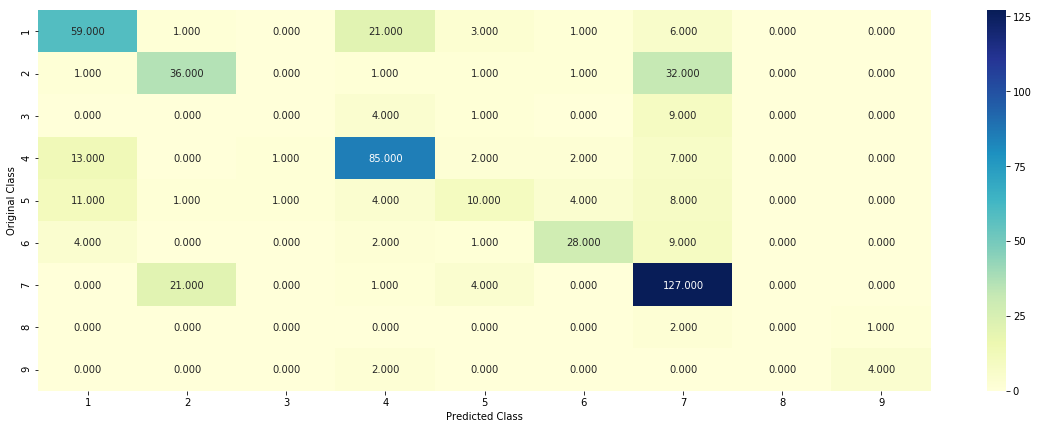

-------------------- Precision matrix (Columm Sum=1) --------------------


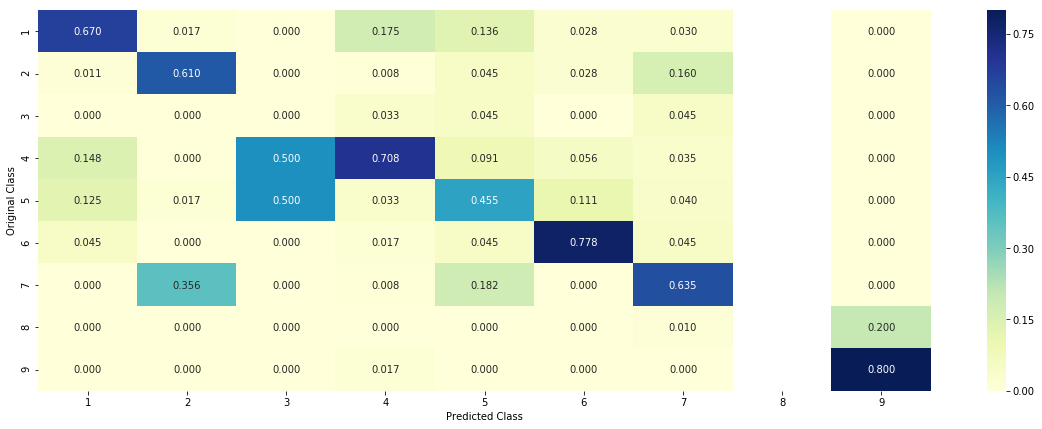

-------------------- Recall matrix (Row sum=1) --------------------


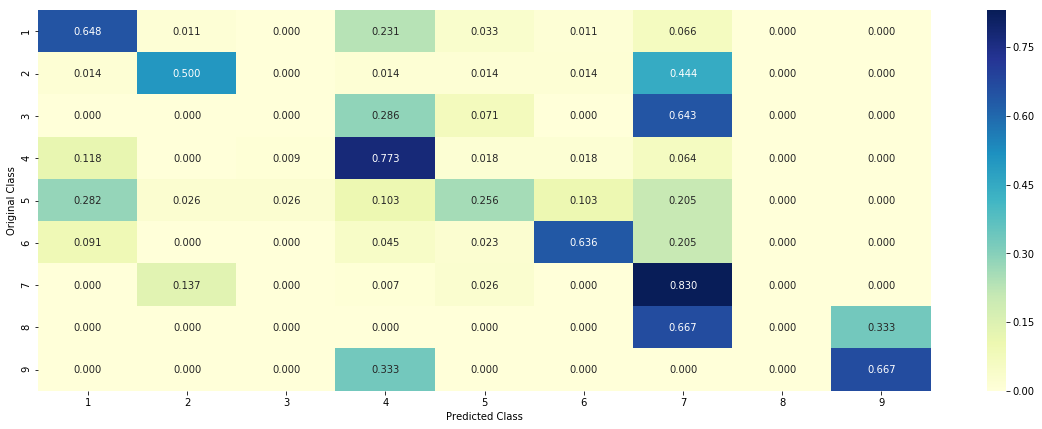

In [19]:
plot_confusion_matrix(y_cv, sig_clf.predict(X_cr.toarray()))

In [20]:
test_point_index = 6
no_feature = 100
predicted_cls = sig_clf.predict(X_tr[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(X_tr[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['TEXT'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.05   0.0621 0.0058 0.0168 0.045  0.0186 0.7969 0.002  0.0029]]
Actual Class : 4
--------------------------------------------------
66 Text feature [drug] present in test data point [True]
73 Text feature [stem] present in test data point [True]
86 Text feature [constructed] present in test data point [True]
87 Text feature [repair] present in test data point [True]
Out of the top  100  features  4 are present in query point


## Applying Random Forest

In [26]:
alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(random_state=0,class_weight='balanced',max_depth=j,n_estimators=i)
        clf.fit(X_tr, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_tr, y_train)
        sig_clf_probs = sig_clf.predict_proba(X_cr)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=0)
clf.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr, y_train)

predict_y = sig_clf.predict_proba(X_tr)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cr)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_te)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


for n_estimators = 10 and max depth =  2
Log Loss : 1.6789759504167479
for n_estimators = 10 and max depth =  3
Log Loss : 1.6106064637052713
for n_estimators = 10 and max depth =  5
Log Loss : 1.4785975717038558
for n_estimators = 10 and max depth =  10
Log Loss : 1.3059556060574469
for n_estimators = 50 and max depth =  2
Log Loss : 1.545893390260941
for n_estimators = 50 and max depth =  3
Log Loss : 1.4492221255660143
for n_estimators = 50 and max depth =  5
Log Loss : 1.3132130029884923
for n_estimators = 50 and max depth =  10
Log Loss : 1.1764584000888256
for n_estimators = 100 and max depth =  2
Log Loss : 1.4799530650035269
for n_estimators = 100 and max depth =  3
Log Loss : 1.3988799386621926
for n_estimators = 100 and max depth =  5
Log Loss : 1.2510471634898188
for n_estimators = 100 and max depth =  10
Log Loss : 1.1509257925576055
for n_estimators = 200 and max depth =  2
Log Loss : 1.440320170561894
for n_estimators = 200 and max depth =  3
Log Loss : 1.3651285831617885

In [32]:
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(X_cr)- y_cv))/y_cv.shape[0])

Number of missclassified point : 0.3458646616541353


-------------------- Confusion matrix --------------------


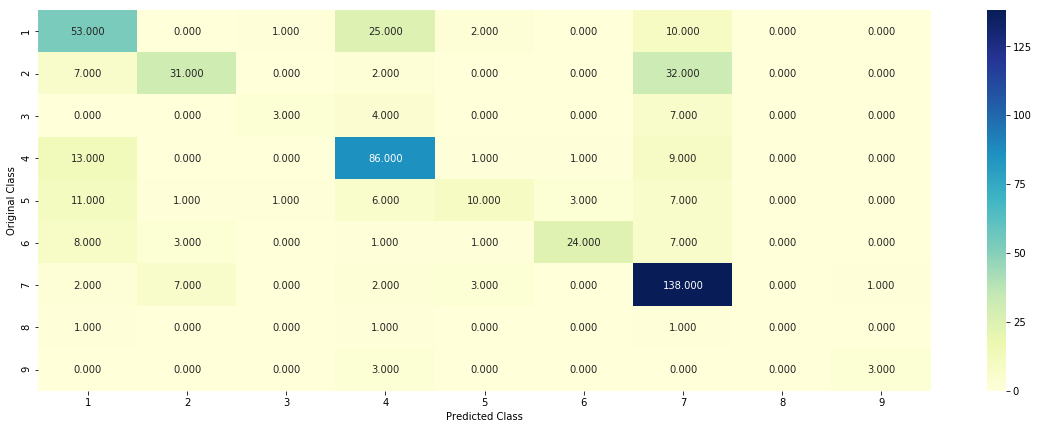

-------------------- Precision matrix (Columm Sum=1) --------------------


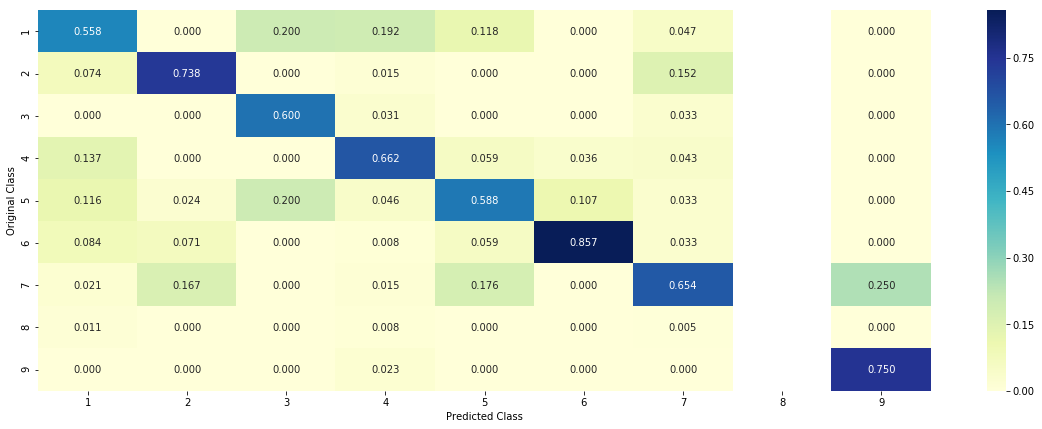

-------------------- Recall matrix (Row sum=1) --------------------


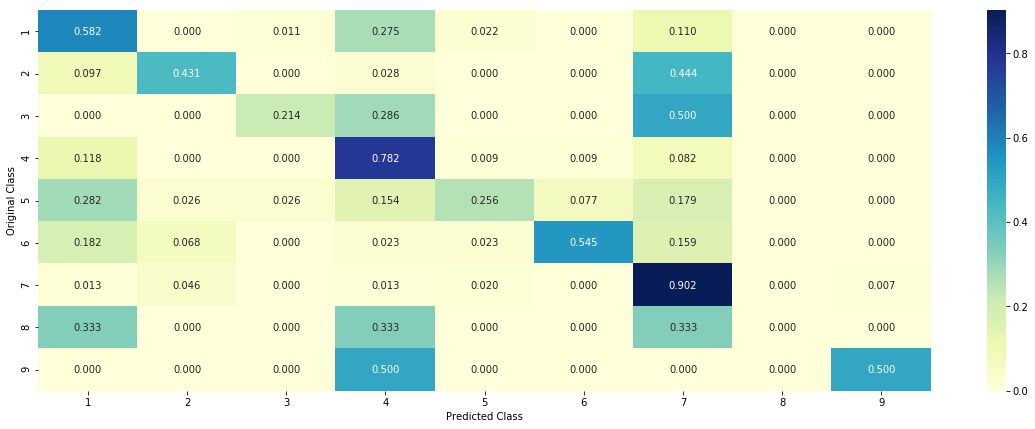

In [27]:
plot_confusion_matrix(y_cv, sig_clf.predict(X_cr.toarray()))

In [31]:
test_point_index = 6
no_feature = 100
predicted_cls = sig_clf.predict(X_tr[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(X_tr[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], X_test['TEXT'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0217 0.0394 0.0146 0.0187 0.0316 0.0257 0.8423 0.0039 0.002 ]]
Actual Class : 4
--------------------------------------------------
9 Text feature [assembly] present in test data point [True]
10 Text feature [introduction] present in test data point [True]
12 Text feature [light] present in test data point [True]
14 Text feature [gbm] present in test data point [True]
17 Text feature [induction] present in test data point [True]
18 Text feature [biochemical] present in test data point [True]
21 Text feature [assessed] present in test data point [True]
22 Text feature [reflect] present in test data point [True]
23 Text feature [biological] present in test data point [True]
26 Text feature [rank] present in test data point [True]
28 Text feature [lesions] present in test data point [True]
31 Text feature [benefit] present in test data point [True]
32 Text feature [vivo] present in test data point [True]
33 Text feature [black] present

## Applying Stacking Classifer

In [41]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_tr, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_tr, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(X_tr, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(X_tr, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(X_cr))))
sig_clf2.fit(X_tr, y_train)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(X_cr))))
sig_clf3.fit(X_tr, y_train)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf3.predict_proba(X_cr))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(X_tr, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(X_cr))))
    log_error =log_loss(y_cv, sclf.predict_proba(X_cr))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.03
Support vector machines : Log Loss: 1.47
Naive Bayes : Log Loss: 1.15
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.178
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.034
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.513
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.121
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.210
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.524


Log loss (train) on the stacking classifier : 0.6172341400567171
Log loss (CV) on the stacking classifier : 1.121143362113574
Log loss (test) on the stacking classifier : 1.1404688968383998
Number of missclassified point : 0.3744360902255639
-------------------- Confusion matrix --------------------


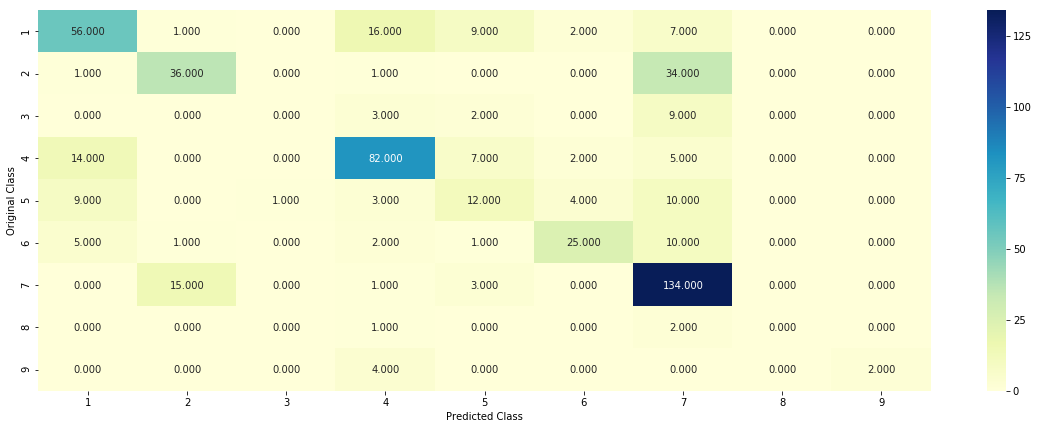

-------------------- Precision matrix (Columm Sum=1) --------------------


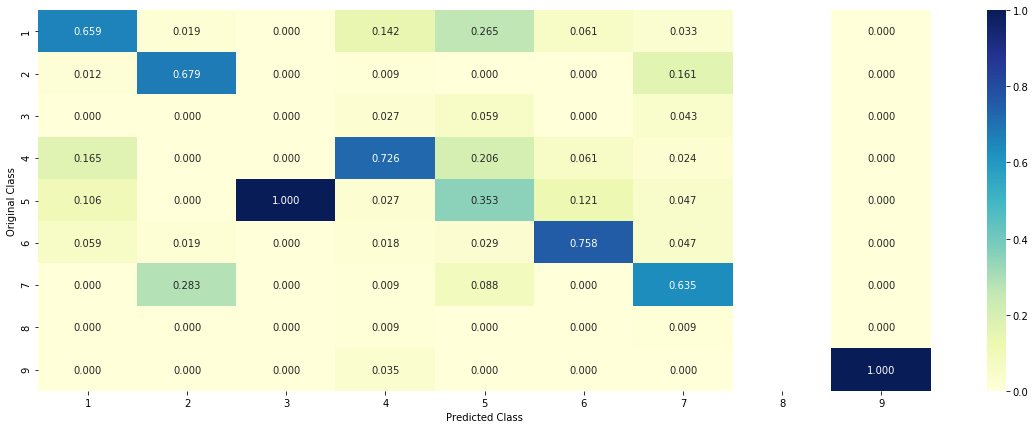

-------------------- Recall matrix (Row sum=1) --------------------


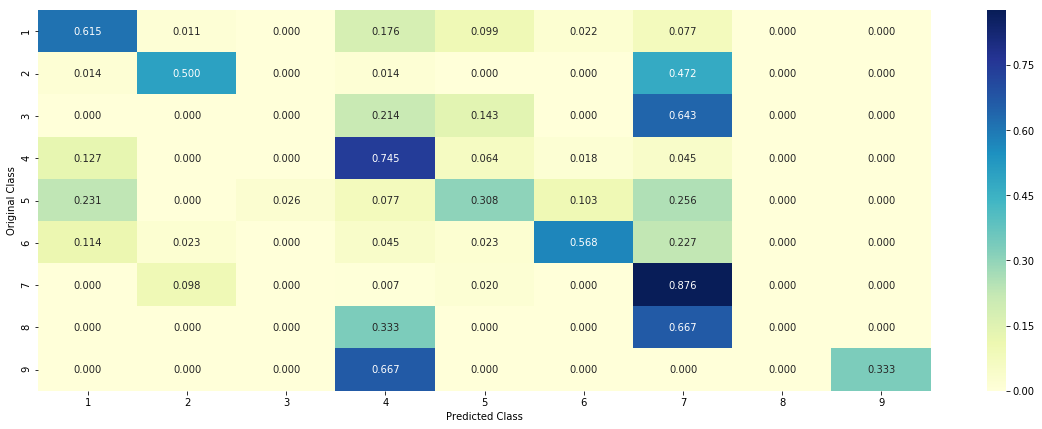

In [46]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(X_tr, y_train)

log_error = log_loss(y_train, sclf.predict_proba(X_tr))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(X_cr))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(X_te))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(X_te)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_cv, sclf.predict(X_cr.toarray()))

## Maximum voting classifier

Log loss (train) on the VotingClassifier : 0.8124247531080436
Log loss (CV) on the VotingClassifier : 1.141885155547533
Log loss (test) on the VotingClassifier : 1.1434246913987303
Number of missclassified point : 0.36541353383458647
-------------------- Confusion matrix --------------------


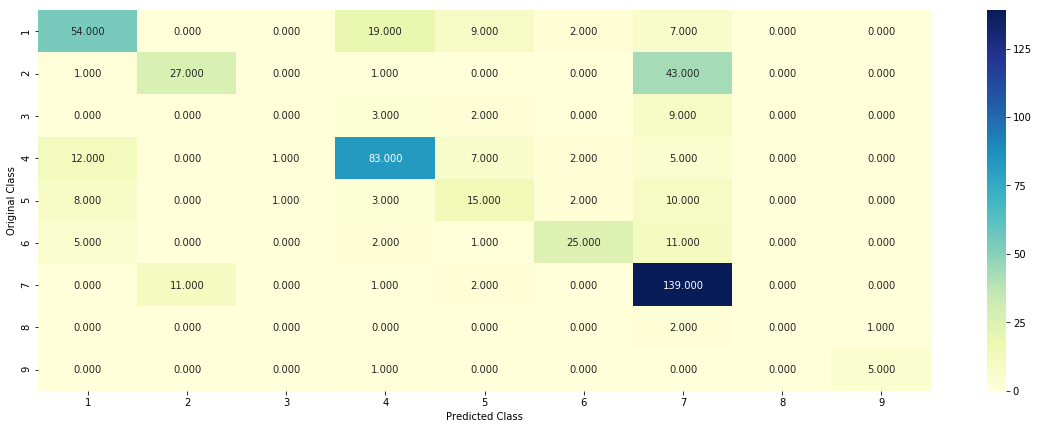

-------------------- Precision matrix (Columm Sum=1) --------------------


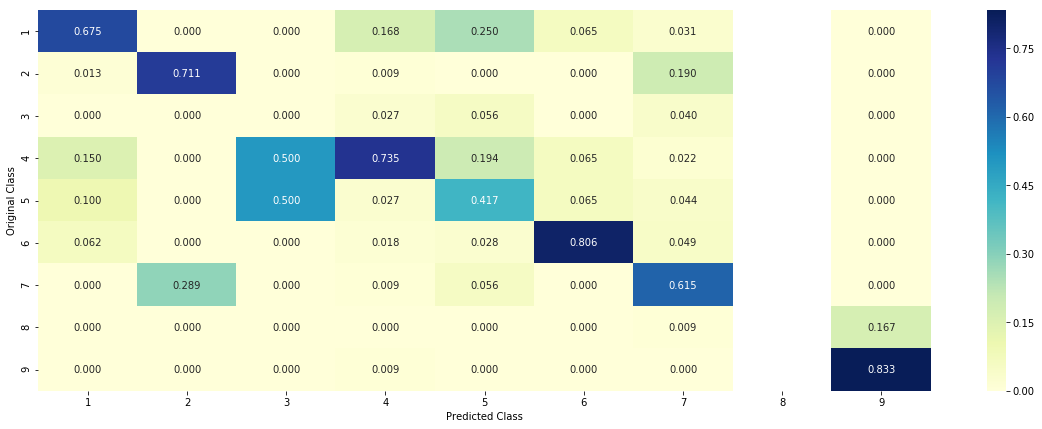

-------------------- Recall matrix (Row sum=1) --------------------


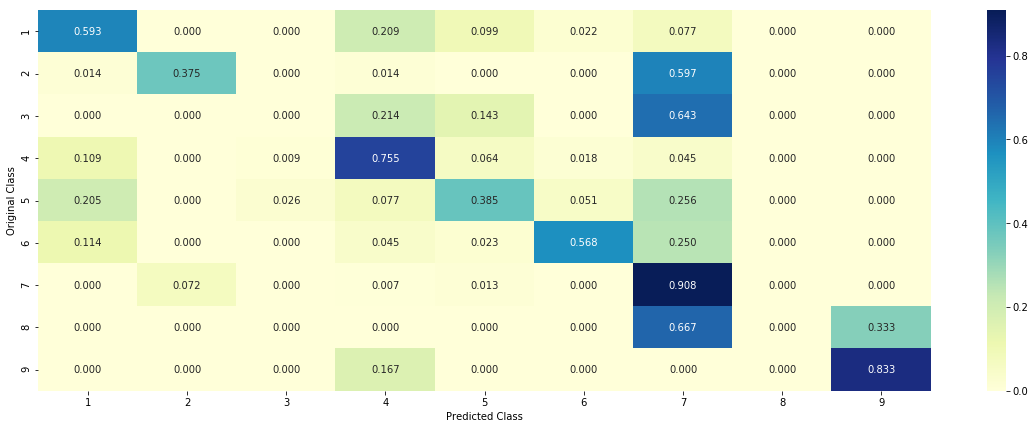

In [45]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(X_tr, y_train)
print("Log loss (train) on the VotingClassifier :", log_loss(y_train, vclf.predict_proba(X_tr)))
print("Log loss (CV) on the VotingClassifier :", log_loss(y_cv, vclf.predict_proba(X_cr)))
print("Log loss (test) on the VotingClassifier :", log_loss(y_test, vclf.predict_proba(X_te)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(X_te)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_cv, vclf.predict(X_cr.toarray()))

## Applying Logistic regression with count vectorizer

In [71]:
vec_essay = CountVectorizer(min_df=3,ngram_range=(1,4), max_features=3000)
vec_essay.fit(X_train['TEXT'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vec_essay.transform(X_train['TEXT'].values)
X_cv_essay_tfidf = vec_essay.transform(X_cv['TEXT'].values)
X_test_essay_tfidf = vec_essay.transform(X_test['TEXT'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)


After vectorizations
(2124, 3000) (2124,)
(532, 3000) (532,)
(665, 3000) (665,)


In [65]:
vec_gene = CountVectorizer()
vec_gene.fit(X_train['Gene'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_gene = vec_gene.transform(X_train['Gene'].values)
X_cv_gene = vec_gene.transform(X_cv['Gene'].values)
X_test_gene = vec_gene.transform(X_test['Gene'].values)

print("After vectorizations")
print(X_train_gene.shape, y_train.shape)
print(X_cv_gene.shape, y_cv.shape)
print(X_test_gene.shape, y_test.shape)
print("="*100)

After vectorizations
(2124, 225) (2124,)
(532, 225) (532,)
(665, 225) (665,)


In [66]:
vec_var = CountVectorizer()
vec_var.fit(X_train['Variation'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Variation = vec_var.transform(X_train['Variation'].values)
X_cv_Variation = vec_var.transform(X_cv['Variation'].values)
X_test_Variation = vec_var.transform(X_test['Variation'].values)

print("After vectorizations")
print(X_train_Variation.shape, y_train.shape)
print(X_cv_Variation.shape, y_cv.shape)
print(X_test_Variation.shape, y_test.shape)
print("="*100)

After vectorizations
(2124, 1956) (2124,)
(532, 1956) (532,)
(665, 1956) (665,)


In [73]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr = hstack((X_train_gene,X_train_Variation,X_train_essay_tfidf)).tocsr()
X_cr = hstack((X_cv_gene,X_cv_Variation,X_cv_essay_tfidf)).tocsr()
X_te = hstack((X_test_gene,X_test_Variation,X_test_essay_tfidf)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(2124, 5181) (2124,)
(532, 5181) (532,)
(665, 5181) (665,)


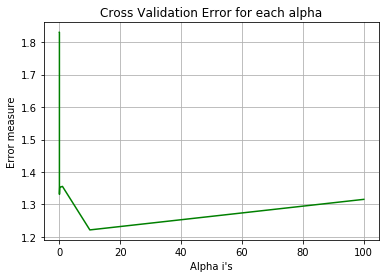

1e-06   1.8304997567764278
1e-05   1.8304997567764278
0.0001   1.38470736362863
0.001   1.3410730086772271
0.01   1.3312320508618982
0.1   1.3527014189400912
1   1.3557084032554203
10   1.2216744775530872
100   1.3158017985180674


In [74]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=0)
    clf.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_tr, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cr)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
#for i, txt in enumerate(np.round(cv_log_error_array,3)):
    #ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
#plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

for i in range(len(alpha)):
    print(alpha[i]," ",cv_log_error_array[i])



In [75]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=0)
clf.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr, y_train)


predict_y = sig_clf.predict_proba(X_tr)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cr)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_te)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(X_cr)- y_cv))/y_cv.shape[0])

For values of best alpha =  10 The train log loss is: 1.0266854039525959
For values of best alpha =  10 The cross validation log loss is: 1.2216744775530872
For values of best alpha =  10 The test log loss is: 1.2273832224333943
Number of missclassified point : 0.462406015037594


-------------------- Confusion matrix --------------------


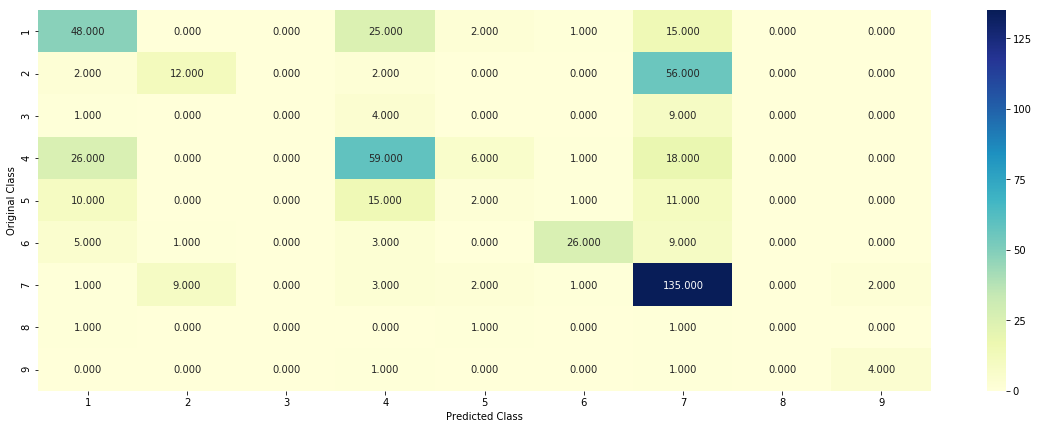

-------------------- Precision matrix (Columm Sum=1) --------------------


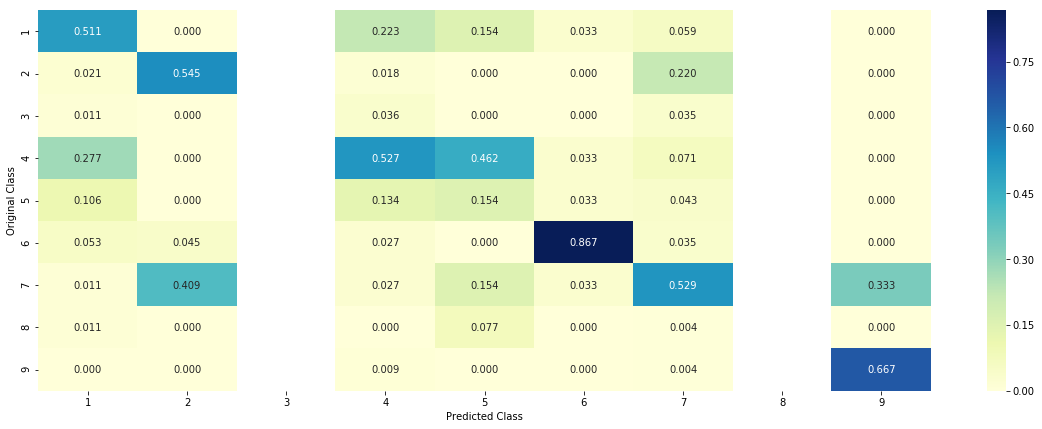

-------------------- Recall matrix (Row sum=1) --------------------


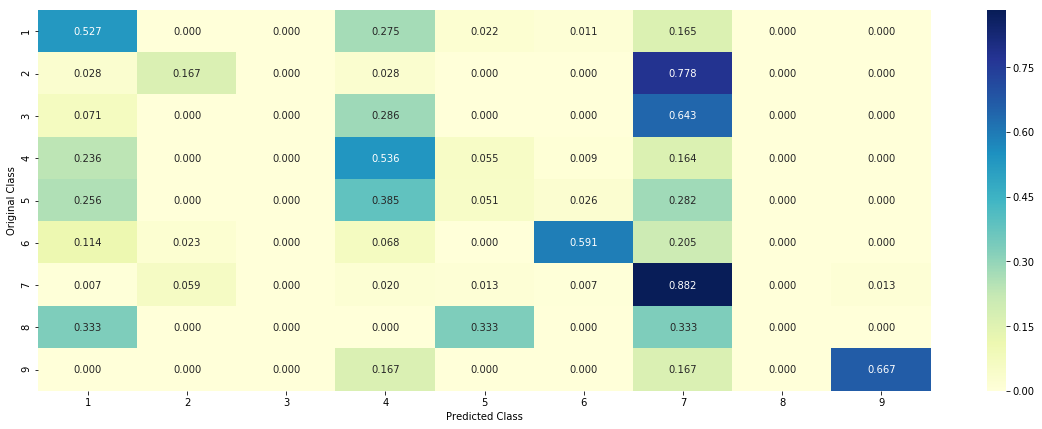

In [76]:
plot_confusion_matrix(y_cv, sig_clf.predict(X_cr.toarray()))

In [77]:
test_point_index = 6
no_feature = 100
predicted_cls = sig_clf.predict(X_tr[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(X_tr[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['TEXT'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[1.510e-02 1.319e-01 8.000e-04 2.700e-03 2.700e-03 4.600e-03 8.408e-01
  1.200e-03 1.000e-04]]
Actual Class : 4
--------------------------------------------------
4 Text feature [old] present in test data point [True]
9 Text feature [actin] present in test data point [True]
14 Text feature [trials] present in test data point [True]
17 Text feature [li] present in test data point [True]
18 Text feature [concentrations] present in test data point [True]
19 Text feature [three] present in test data point [True]
24 Text feature [acquired] present in test data point [True]
28 Text feature [error] present in test data point [True]
29 Text feature [propose] present in test data point [True]
31 Text feature [cell] present in test data point [True]
34 Text feature [gastric] present in test data point [True]
37 Text feature [primary] present in test data point [True]
38 Text feature [established] present in test data point [True]
45 Text featur

## Summary

In [15]:
#code copied from -http://zetcode.com/python/prettytable/
from prettytable import PrettyTable   
x = PrettyTable()
x.field_names = ["Model", "train", "cv","test","%Misclassified ", "Interpretable"]
x.add_row(["Naive Bayes", 0.628, 1.159, 1.194, 0.351, "Yes"])
x.add_row(["Logistic(Tfidf)", 0.418, 0.984, 0.976, 0.342, "Yes"])
x.add_row(["KNN", 0.892, 1.100, 1.077, 0.372, "No"])
x.add_row(["SVM", 0.388, 1.016, 1.012, 0.343, "Yes"])
x.add_row(["Stacking ", 0.617, 1.121, 1.140, 0.374, "No"])
x.add_row(["Maximum voting ", 0.812, 1.141, 1.143, 0.365, "No"])
x.add_row(["Logistic(Count)", 1.026, 1.221, 1.227, 0.462, "Yes"])
print(x)

+-----------------+-------+-------+-------+-----------------+---------------+
|      Model      | train |   cv  |  test | %Misclassified  | Interpretable |
+-----------------+-------+-------+-------+-----------------+---------------+
|   Naive Bayes   | 0.628 | 1.159 | 1.194 |      0.351      |      Yes      |
| Logistic(Tfidf) | 0.418 | 0.984 | 0.976 |      0.342      |      Yes      |
|       KNN       | 0.892 |  1.1  | 1.077 |      0.372      |       No      |
|       SVM       | 0.388 | 1.016 | 1.012 |      0.343      |      Yes      |
|    Stacking     | 0.617 | 1.121 |  1.14 |      0.374      |       No      |
| Maximum voting  | 0.812 | 1.141 | 1.143 |      0.365      |       No      |
| Logistic(Count) | 1.026 | 1.221 | 1.227 |      0.462      |      Yes      |
+-----------------+-------+-------+-------+-----------------+---------------+


### Conclusion
1. Using Logistic regression on Tfidf we got the log loss value less than 1.0 on all the three data sets i.e Train, CV and Test
2. Logistic regression on Tfidf also gave the lowest percentage of misclassified points i.e 34.2 percent only
3. Logistic regression on Tfidf is also interpretable as we can get the names of the important features easily.
4. Therefore the best ML model which can be applied on this data set is Logistic Regression on Tfidf